# Proyecto Precios de Aguacates

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

Source: https://www.kaggle.com/neuromusic/avocado-prices

# Inicio proyecto y análisis

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TheilSenRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

Importamos el dataset y analizamos los datos.

In [2]:
avocados = pd.read_csv("data/avocado.csv")
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocados.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
avocados.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
avocados['region'].value_counts()

TotalUS                338
LasVegas               338
GreatLakes             338
HartfordSpringfield    338
Denver                 338
Charlotte              338
NewOrleansMobile       338
Chicago                338
Nashville              338
DallasFtWorth          338
Houston                338
Albany                 338
SouthCentral           338
Atlanta                338
Plains                 338
Louisville             338
West                   338
Roanoke                338
HarrisburgScranton     338
SanDiego               338
Detroit                338
Midsouth               338
NorthernNewEngland     338
LosAngeles             338
CincinnatiDayton       338
Boise                  338
Southeast              338
RichmondNorfolk        338
Spokane                338
Sacramento             338
BuffaloRochester       338
Philadelphia           338
Orlando                338
GrandRapids            338
Indianapolis           338
Tampa                  338
NewYork                338
S

Eliminamos las columnas: *Unnamed* que no nos proporciona información ninguna ya que son los índices, *Date* ya que ya tenemos una variable que es *year* que nos proporciona las fechas y *region* ya que tiene muchos valores.

In [6]:
avocados.drop(['Unnamed: 0', 'Date', 'region'] , axis=1, inplace=True)

In [7]:
avocados.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
dtype: int64

In [8]:
avocados.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015


Calculamos la correlación de la tabla y la representamos.

In [9]:
avocados.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

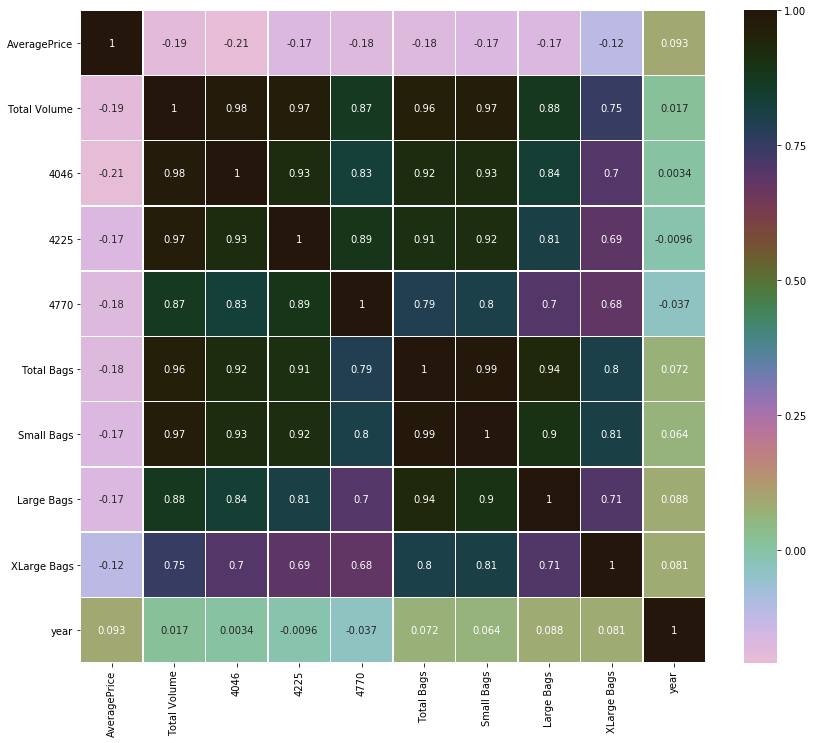

In [10]:
plt.figure(figsize=(14,12))
cmap = sns.cubehelix_palette(20, rot=4, light=0.8, dark=0.1, as_cmap=True)
sns.heatmap(avocados.corr(),linewidths=0.5, cmap=cmap, annot=True)
plt.yticks(rotation=0)

Comprobamos que todas las variables no están correladas (o están incorreladas) con el Precio Medio pero sí están bastante correladas las unas con las otras.

In [11]:
avocados['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

Hacemos los  dummies en la variable *type* que como comprobamos que solo tiene dos resultados: organic o conventional.

In [12]:
dfavocados = pd.get_dummies(avocados, drop_first=True)
dfavocados.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


# Modelaje en ML

Hacemos una ANOVA para comprobar qué columnas se pueden eliminar.

In [13]:
dfavocados.columns.values

array(['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'type_organic'], dtype=object)

In [14]:
anova = []
for col in dfavocados.columns.values:      
    a = (stats.f_oneway(dfavocados[col][dfavocados['type_organic']==0], dfavocados['type_organic']==1)) 
    anova.append((col, a))
    
significant_columns = [i[0] for i in anova if i[1][1]<0.05]
significant_columns

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'type_organic']

Dado que me da todas las columnas no me sirve el ANOVA, voy a probar a hacer los modelos de Machine Learning sin eliminar columnas.

Establecemos una muestra de 80% entrenamiento y 20% testeo.

In [15]:
#dfavocados['AveragePrice']
X = dfavocados.drop(axis=1, labels=['AveragePrice'])
y = dfavocados['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Machine Learning

Como la variable a analizar es una variable continua en el tiempo, ya que es un precio, hay que usar modelos de regresión para su modelaje. Los que he escogido son:
- **Modelo de Regresión Lineal**: minimiza la suma residual de los cuadrados entre los valores observados y los valores predichos por aproximación lineal. Es bueno cuando hay una independencia entre las variables por lo que es muy sensible a los errores aleatorios.
- **Árboles de Decisión**: su objetivo es crear un modelo que prediga el valor de una variable objetivo mediante el aprendizaje de reglas de decisión simples inferidas a partir de las características de los datos.
- **Soporte Vectorial o SVR**: a diferencia de un modelo de regresión simple donde minimizamos el ratio de error, en SVR se intenta que el error se quede dentro de una recta determinada.
- **Estimador Theil-Sein**: es un estimador robusto. Trabaja en base a un subset aleatorio y usa una generalización de la mediana en diferentes dimensiones (por eso es robusta en cuanto a los outliers).
- **Bosques Aleatorios**: es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. Promedia muchos modelos ruidosos pero aproximadamente imparciales, y por tanto reduce la variación.

### Modelo de Regresión Lineal

In [16]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = model_lr.predict(X_test)

Dado que no me deja calcular la accuracy ya que son variables continuas, hago los errores del modelo para ver qué tan bueno es.
- **Error Absoluto Medio**: diferencia entre dos variables continuas. Es la diferencia entre las medias de los errores absolutos, donde una variable es el valor y la otra es su predicción.
- **Error Cuadrático Medio**: halla la diferencia entre el estimador y lo que se estima.
- **Raíz del Error Cuadrático Medio**: es la raíz cuadrada del promedio de los errores. Es siempre no negativa, y un valor cercano al 0 indicaría un ajuste mejor a los datos.

In [18]:
print('Error Absoluto Medio: ', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio: ', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio:  0.24169659011168487
Error Cuadrático Medio:  0.10042958080237144
Raíz del Error Cuadrático Medio:  0.31690626500965774


El **Coeficiente de Determinación R Cuadrado** se halla a través del *.score* y nos compara las predicciones con los valores del testeo. Cuanto más cerca de 1 esté su valor, mayor será el ajuste del modelo a la variable. 

In [19]:
model_lr.score(X_test, y_test)

0.39731301744953706

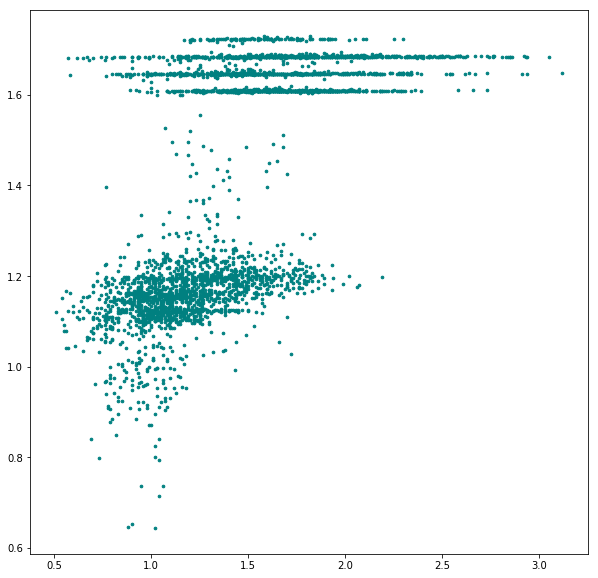

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test, y=y_pred, color='teal', s=7)
plt.show()

Viendo su representación no podemos ver una línea recta clara por lo que no es el mejor modelo (y tiene un valor R Cuadrado bastante malo).

### Modelo de Regresión de Árbol de Decisión

In [21]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [22]:
y_pred = model_dtr.predict(X_test)

In [23]:
print('Error Absoluto Medio: ', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio: ', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio:  0.15790684931506851
Error Cuadrático Medio:  0.05905923287671233
Raíz del Error Cuadrático Medio:  0.24302105438976337


In [24]:
model_dtr.score(X_test, y_test)

0.6455802108319627

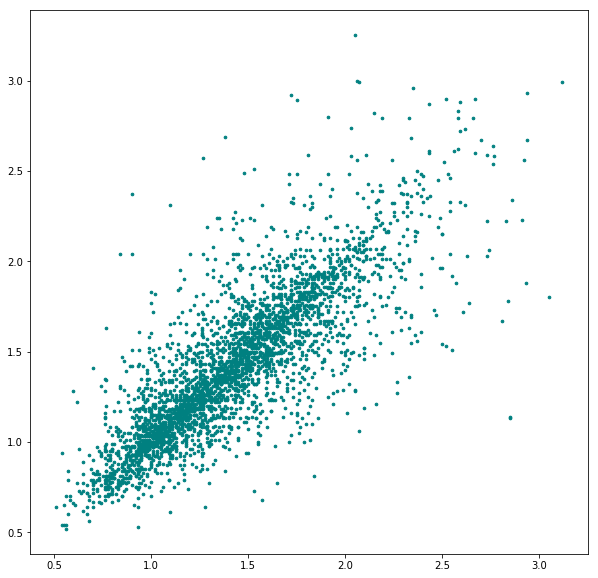

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test, y=y_pred, color='teal', s=7)
plt.show()

Este modelo es mejor que el anterior, en cuanto a que ya podemos distinguir una forma en su representación y el R Cuadrado tiene un mejor valor.

### Modelo de Regresión de Soporte Vectorial

In [26]:
model_clf = SVR(gamma='scale')
model_clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = model_clf.predict(X_test)

In [28]:
print('Error Absoluto Medio: ', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio: ', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio:  0.2503088575884775
Error Cuadrático Medio:  0.10959268470354855
Raíz del Error Cuadrático Medio:  0.33104785863006053


In [29]:
model_clf.score(X_test, y_test)

0.34232440356829297

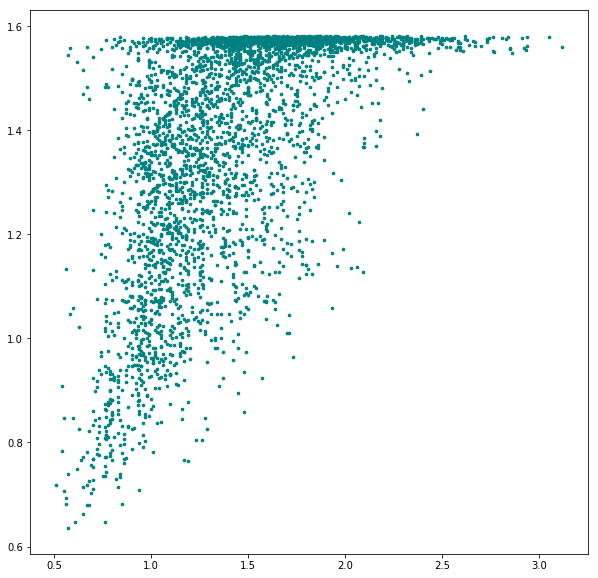

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test, y=y_pred, color='teal', s=7)
plt.show()

En este caso no hay un buen valor de R Cuadrado y su representación abarca mucho ruido.

### Modelo de Regresión Theil-Sein

In [31]:
model_ts = TheilSenRegressor()
model_ts.fit(X_train, y_train)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=None, tol=0.001, verbose=False)

In [32]:
y_pred = model_ts.predict(X_test)

In [33]:
print('Error Absoluto Medio: ', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio: ', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio:  29.66197666180339
Error Cuadrático Medio:  24736.86327514082
Raíz del Error Cuadrático Medio:  157.2795704315752


In [34]:
model_ts.score(X_test, y_test)

-148447.1500962906

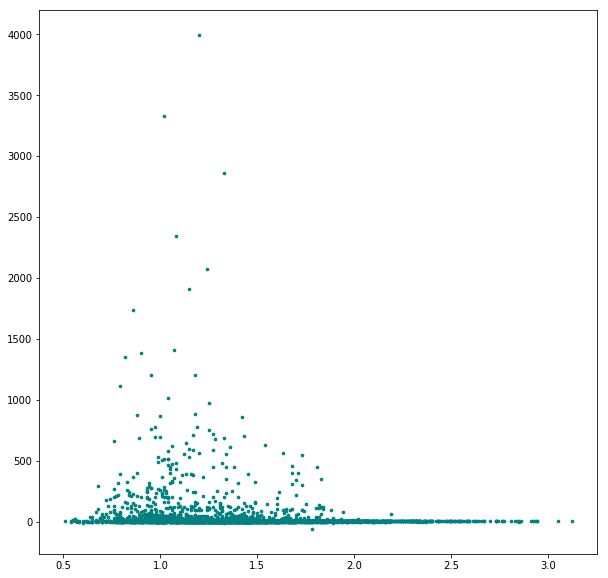

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test, y=y_pred, color='teal', s=7)
plt.show()

En este caso, mientras que la gráfica nos muestra una línea recta bastante clara, pero a costa de los valores outliers, el R Cuadrado se ve claramente que nos dice que no es un buen modelo.
El problema está en que trabaja con subsets aleatorios por lo que cambia el resultado y la gráfica según el subset.

### Modelo de Regresión de Bosques Aleatorios

In [36]:
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [37]:
y_pred = model_rf.predict(X_test)

In [38]:
print('Error Absoluto Medio: ', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio: ', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio:  0.12007964383561644
Error Cuadrático Medio:  0.02979863123013699
Raíz del Error Cuadrático Medio:  0.17262280043533354


In [39]:
model_rf.score(X_test, y_test)

0.8211757233601717

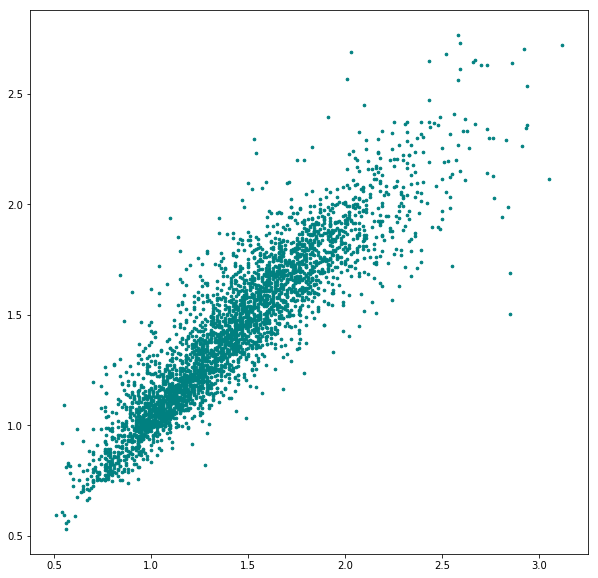

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test, y=y_pred, color='teal', s=7)
plt.show()

Es el que nos da un mayor valor R Cuadrado y se puede representar claramente una linea recta.

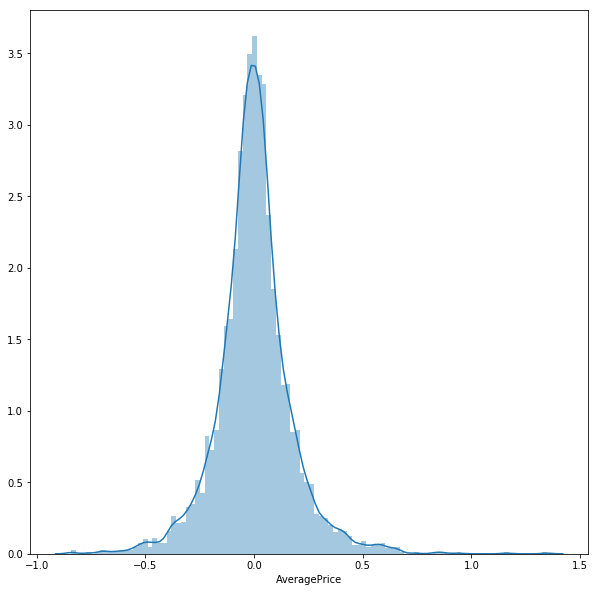

In [41]:
plt.figure(figsize=(10,10))
sns.distplot((y_test-y_pred), bins=100)

Observamos que los datos se distribuyen como una normal por lo que nos indica que el modelo elegido es correcto.

In [42]:
df = pd.DataFrame({'Y Test':y_test , 'Y Pred':y_pred}, columns=['Y Test','Y Pred'])
df.head()

,Y Test,Y Pred
17519,2.10,1.8379
2361,0.90,0.8698
5885,1.13,1.4122
5480,1.15,1.1284
8038,0.88,0.7399


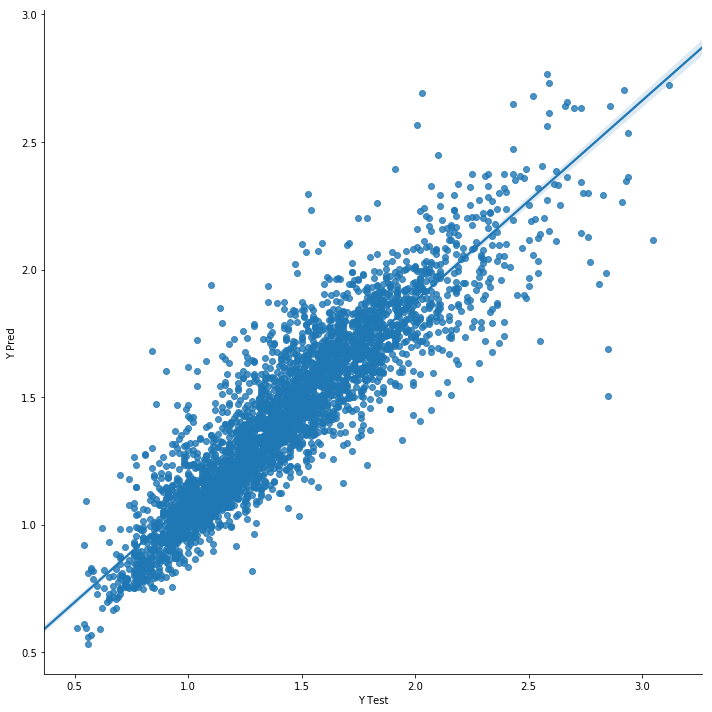

In [43]:
sns.lmplot(x='Y Test', y='Y Pred', data=df, height=10)